<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">age group analize </h3>
</div>

## Importing the libraries

In [1]:
#Let's Import the Packages...
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

<div class="alert alert-block alert-info" dir="ltr" style="text-align: center;"><strong><span style="font-family: courier new, courier; font-size: 18pt;">load Data </span></strong>
<p style="text-align: center;"><strong><span style="font-family: courier new, courier; font-size: 18pt;"> 
</div>

## Load 

In [2]:
#Let's Read csv file
data_Total = pd.read_csv("C:/Users/Salio/Desktop/NEW_article/data.csv")
#Show some records of dataframe
data_Total.sample(10)

,ID_Patient,Sex,Age,Age_Group,Glabellar,Piriform_Height,Maxillary,Piriform_Width,Male_Group,Femle_Group
5,jafari,1,21,1,62.50,34.47,88.65,24.59,1,
50,bahirai,2,20,1,74.00,30.80,81.90,23.00,,1
74,eghbali,2,53,3,71.30,31.55,77.87,25.36,,3
3,teymoriyan,1,21,1,62.55,34.47,88.66,24.53,1,
45,minayi,1,65,4,57.30,35.80,86.80,25.94,4,
75,nazadi,2,54,3,71.20,31.59,77.80,25.40,,3
83,sabrai,2,60,3,71.00,31.70,77.66,25.84,,3
34,baghbani,1,44,2,59.10,35.40,87.60,25.00,2,
0,khatoni,1,20,1,62.70,34.41,88.70,24.50,1,
72,rezvanpur,2,50,3,71.80,31.51,78.00,25.10,,3


<div class="alert alert-block alert-info" dir="ltr" style="text-align: center;"><strong><span style="font-family: courier new, courier; font-size: 18pt;">Prepare Data and EDA </span></strong>
<p style="text-align: center;"><strong><span style="font-family: courier new, courier; font-size: 18pt;"> 
</div>

## EDA and Prepare Data

In [3]:
data_Total.index

RangeIndex(start=0, stop=100, step=1)

In [4]:
# get information about data!!
data_Total.info()
# In this data some features are in the form object (Geography -Gender -Surname)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID_Patient       100 non-null    object 
 1   Sex              100 non-null    int64  
 2   Age              100 non-null    int64  
 3   Age_Group        100 non-null    int64  
 4   Glabellar        100 non-null    float64
 5   Piriform_Height  100 non-null    float64
 6   Maxillary        100 non-null    float64
 7   Piriform_Width   100 non-null    float64
 8   Male_Group       100 non-null    object 
 9   Femle_Group      100 non-null    object 
dtypes: float64(4), int64(3), object(3)
memory usage: 7.9+ KB


In [5]:
# Check columns list and missing values
data_Total.isnull().sum()

ID_Patient         0
Sex                0
Age                0
Age_Group          0
Glabellar          0
Piriform_Height    0
Maxillary          0
Piriform_Width     0
Male_Group         0
Femle_Group        0
dtype: int64

In [6]:
# Get unique count for each variable
data_Total.nunique()

ID_Patient         96
Sex                 2
Age                49
Age_Group           4
Glabellar          57
Piriform_Height    82
Maxillary          91
Piriform_Width     70
Male_Group          5
Femle_Group         5
dtype: int64

In [7]:
# Drop the columns as explained above---->("RowNumber", "CustomerId", "Surname")

data_sel = data_Total.drop(["ID_Patient", "Male_Group", "Femle_Group","Age_Group"], axis = 1)
data_sel

,Sex,Age,Glabellar,Piriform_Height,Maxillary,Piriform_Width
0,1,20,62.70,34.41,88.70,24.50
1,1,21,62.60,34.45,88.69,24.55
2,1,21,62.50,34.46,88.68,24.50
3,1,21,62.55,34.47,88.66,24.53
4,1,21,62.45,34.46,88.67,24.50
...,...,...,...,...,...,...
95,2,68,70.50,31.78,77.34,25.89
96,2,69,70.70,31.78,77.25,26.00
97,2,69,70.40,31.79,77.20,26.12
98,2,71,70.00,31.80,77.10,26.21


In [8]:
corr =data_sel.corr()
corr.shape

(6, 6)

<AxesSubplot:>

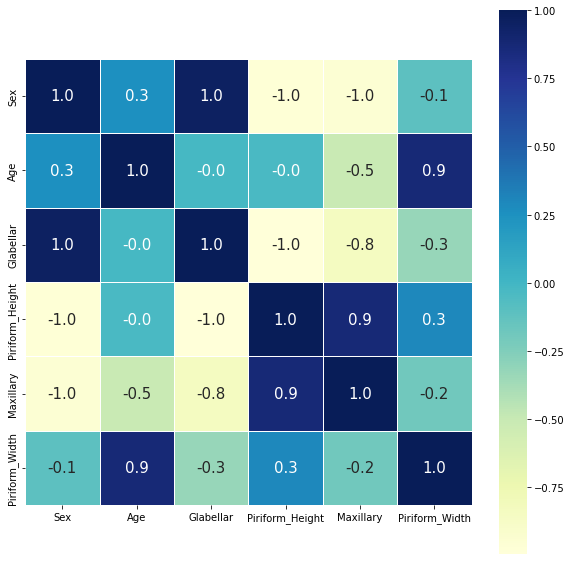

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='YlGnBu',linewidths=.5)

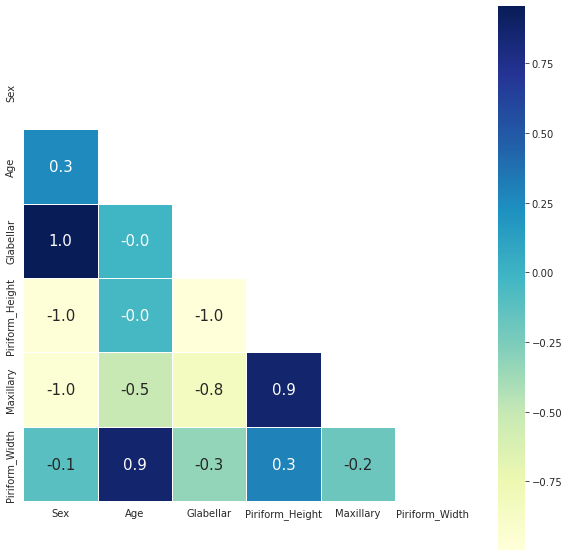

In [10]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10, 10))
    ax = sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='YlGnBu',linewidths=.5,mask = mask)

In [11]:
data_sel = data_Total.drop(["ID_Patient", "Male_Group", "Femle_Group","Age"], axis = 1)
data_sel

,Sex,Age_Group,Glabellar,Piriform_Height,Maxillary,Piriform_Width
0,1,1,62.70,34.41,88.70,24.50
1,1,1,62.60,34.45,88.69,24.55
2,1,1,62.50,34.46,88.68,24.50
3,1,1,62.55,34.47,88.66,24.53
4,1,1,62.45,34.46,88.67,24.50
...,...,...,...,...,...,...
95,2,4,70.50,31.78,77.34,25.89
96,2,4,70.70,31.78,77.25,26.00
97,2,4,70.40,31.79,77.20,26.12
98,2,4,70.00,31.80,77.10,26.21


In [12]:
corr =data_sel.corr()
corr.shape

(6, 6)

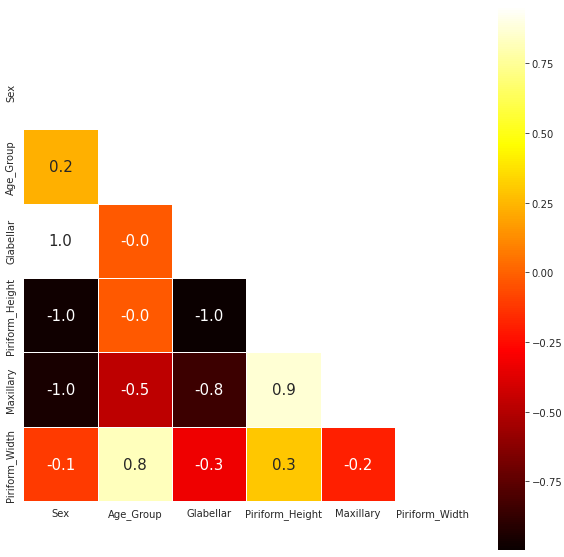

In [13]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10, 10))
    ax = sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='hot',linewidths=.5,mask = mask)

In [14]:
print('seaborn: %s' % sns.__version__)

seaborn: 0.11.2


In [15]:
print(sklearn.__version__)

0.24.2


In [16]:
print()

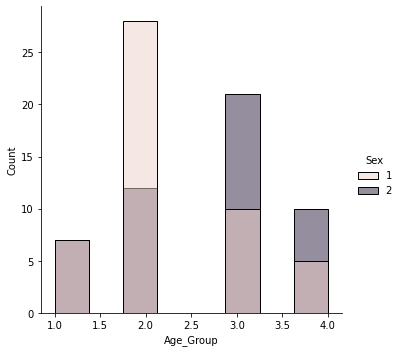

In [17]:
# number of total Servived sex
sns.displot(data=data_sel, x="Age_Group",hue='Sex') 

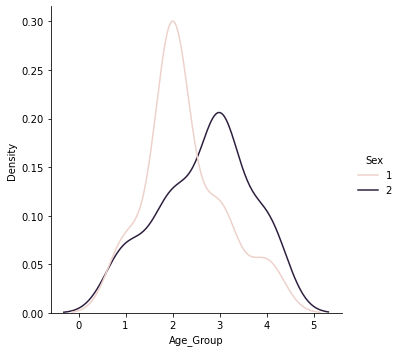

In [18]:
sns.displot(data=data_sel, x="Age_Group",hue='Sex',kind ='kde') 

<div class="alert alert-block alert-info" dir="ltr" style="text-align: center;"><strong><span style="font-family: courier new, courier; font-size: 18pt;">Train  Model </span></strong>
<p style="text-align: center;"><strong><span style="font-family: courier new, courier; font-size: 18pt;">
</div>

<div class="alert alert-block alert-info" dir="ltr" style="text-align: center;"><strong><span style="font-family: courier new, courier; font-size: 18pt;">Logistic Regression </span></strong>

In [19]:
from sklearn.linear_model import LogisticRegression # for Logistic Regression Algorithm
from sklearn.model_selection import train_test_split # to split the dataset for training and testing 
from sklearn import metrics # for checking the model accuracy


In [20]:
data_sel

,Sex,Age_Group,Glabellar,Piriform_Height,Maxillary,Piriform_Width
0,1,1,62.70,34.41,88.70,24.50
1,1,1,62.60,34.45,88.69,24.55
2,1,1,62.50,34.46,88.68,24.50
3,1,1,62.55,34.47,88.66,24.53
4,1,1,62.45,34.46,88.67,24.50
...,...,...,...,...,...,...
95,2,4,70.50,31.78,77.34,25.89
96,2,4,70.70,31.78,77.25,26.00
97,2,4,70.40,31.79,77.20,26.12
98,2,4,70.00,31.80,77.10,26.21


In [21]:
X = data_sel.drop(['Age_Group'],axis = 1)
y = data_sel['Age_Group']
y

0     1
1     1
2     1
3     1
4     1
     ..
95    4
96    4
97    4
98    4
99    4
Name: Age_Group, Length: 100, dtype: int64

In [22]:
print(X.shape)
print(y.shape)

(100, 5)
(100,)


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.25, random_state = 4)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(75, 5)
(75,)
(25, 5)
(25,)


In [24]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [25]:
y_pred = logreg.predict(X_test)

In [26]:
print('The accuracy of Logistic Regression is: ', (metrics.accuracy_score(y_test, y_pred)))

The accuracy of Logistic Regression is:  0.68


In [27]:
from sklearn.metrics import recall_score
print('The Recall of Logistic Regression is: ', (metrics.recall_score(y_test, y_pred,average='micro')))

The Recall of Logistic Regression is:  0.68


In [28]:
# Precision
from sklearn.metrics import precision_score
print('The Precision of Logistic Regression is: ', (metrics.precision_score(y_test, y_pred,average='micro')))

The Precision of Logistic Regression is:  0.68


In [29]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.25      0.40         4
           2       0.64      1.00      0.78         9
           3       0.71      0.62      0.67         8
           4       0.67      0.50      0.57         4

    accuracy                           0.68        25
   macro avg       0.76      0.59      0.61        25
weighted avg       0.73      0.68      0.65        25



In [31]:
confusion_matrix = pd.crosstab(logreg.predict(X),y)

In [32]:
confusion_matrix

Age_Group,1,2,3,4
row_0,,,,
1,4,0,0,0
2,10,40,3,0
3,0,0,26,7
4,0,0,2,8


In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [34]:
cm =confusion_matrix(y_test, y_pred)

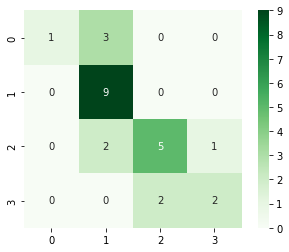

In [35]:
sns.heatmap(cm,square=True , annot=True, cmap="Greens")
plt.show()

<div class="alert alert-block alert-info" dir="ltr" style="text-align: center;"><strong> <span style="font-family: courier new, courier; font-size: 18pt;"> KNN Regressor</span></strong>

In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.25, random_state = 4)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(75, 5)
(75,)
(25, 5)
(25,)


In [38]:
knn = KNeighborsClassifier()

In [39]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [40]:
y_pred_knn = knn.predict(X_test)

In [41]:
knn.score(X_train, y_train)

0.9066666666666666

In [42]:
knn.score(X_test, y_test)

0.96

In [43]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [44]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         9
           3       0.89      1.00      0.94         8
           4       1.00      0.75      0.86         4

    accuracy                           0.96        25
   macro avg       0.97      0.94      0.95        25
weighted avg       0.96      0.96      0.96        25



<AxesSubplot:>

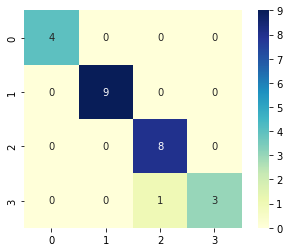

In [45]:
cm =confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm, square=True , annot=True,cmap ="YlGnBu")

## Optimal value of K

In [46]:
error_rate = []
# Might take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

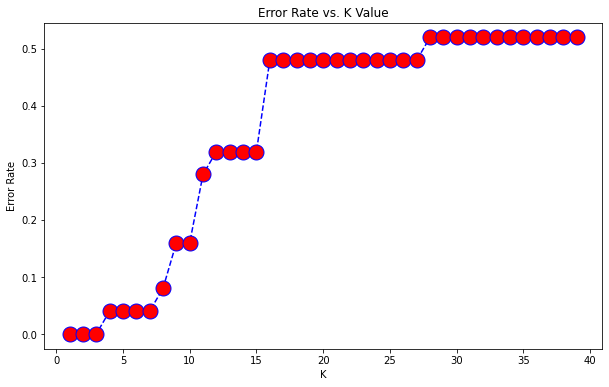

In [47]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=15)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [48]:
# min Error Rate  = 3
knn_Node2 = KNeighborsClassifier(n_neighbors=2)

In [49]:
knn_Node2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [50]:
y_pred_knn_Node2 = knn_Node2.predict(X_test)

In [51]:
knn_Node2.score(X_train, y_train)

0.9733333333333334

In [52]:
knn_Node2.score(X_test, y_test)

1.0

In [53]:
print(classification_report(y_test, y_pred_knn_Node2))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         4

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



<div class="alert alert-block alert-info" dir="ltr" style="text-align: center;"><strong> <span style="font-family: courier new, courier; font-size: 18pt;"> Decision Tree</span></strong>

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(75, 5)
(75,)
(25, 5)
(25,)


In [55]:
from sklearn.tree import DecisionTreeClassifier
classifier_Decicsion = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_Decicsion.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [56]:
y_pred_Decision = classifier_Decicsion.predict(X_test)

In [57]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_Decision)
print(cm)
accuracy_score(y_test,y_pred_Decision)

[[5 0 0 0]
 [1 9 0 0]
 [0 0 6 0]
 [0 0 2 2]]


0.88

<AxesSubplot:>

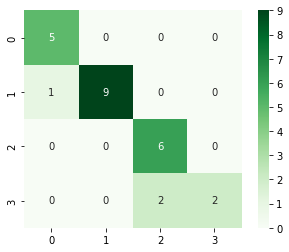

In [58]:
sns.heatmap(cm, square=True , annot=True,cmap="Greens")

In [59]:
print(classification_report(y_test, y_pred_Decision))

              precision    recall  f1-score   support

           1       0.83      1.00      0.91         5
           2       1.00      0.90      0.95        10
           3       0.75      1.00      0.86         6
           4       1.00      0.50      0.67         4

    accuracy                           0.88        25
   macro avg       0.90      0.85      0.85        25
weighted avg       0.91      0.88      0.87        25



<div class="alert alert-block alert-info" dir="ltr" style="text-align: center;"><strong> <span style="font-family: courier new, courier; font-size: 18pt;"> Random Forest </span></strong>

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.25, random_state = 4)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(75, 5)
(75,)
(25, 5)
(25,)


In [61]:
# Building  Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion = 'entropy', random_state = 42)
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=42)

In [62]:
from sklearn.metrics import f1_score
rfc_pred_test = rfc.predict(X_test)
print('Testing Set Evaluation F1-Score=>',f1_score(y_test,rfc_pred_test,average = 'micro'))

Testing Set Evaluation F1-Score=> 1.0


In [63]:
print(classification_report(y_test, rfc_pred_test))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         4

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



<AxesSubplot:>

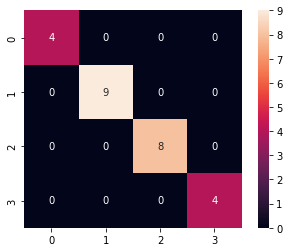

In [64]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,rfc_pred_test)

sns.heatmap(cm, square=True , annot=True)

<div class="alert alert-block alert-info" dir="ltr" style="text-align: center;"><strong> <span style="font-family: courier new, courier; font-size: 18pt;"> SVM </span></strong>

In [65]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(kernel='linear')

In [66]:
y_pred_svm = svclassifier.predict(X_test)

In [67]:
y_pred_svm

array([2, 2, 3, 2, 2, 2, 1, 4, 3, 4, 4, 1, 3, 2, 2, 3, 2, 2, 3, 1, 3, 1,
       3, 3, 3], dtype=int64)

In [68]:
accuracy = accuracy_score(y_test, y_pred_svm) * 100
print("Accuracy of the Logistic Regression Model: ",accuracy)

Accuracy of the Logistic Regression Model:  88.0


In [69]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred_svm))
print(classification_report(y_test,y_pred_svm))

[[4 0 0 0]
 [0 9 0 0]
 [0 0 7 1]
 [0 0 2 2]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         9
           3       0.78      0.88      0.82         8
           4       0.67      0.50      0.57         4

    accuracy                           0.88        25
   macro avg       0.86      0.84      0.85        25
weighted avg       0.88      0.88      0.87        25



<AxesSubplot:>

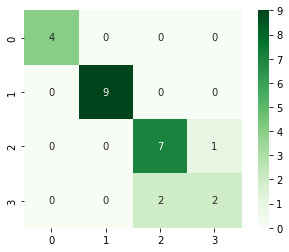

In [70]:
cm =confusion_matrix(y_test,y_pred_svm)
sns.heatmap(cm, square=True , annot=True,cmap="Greens")

<div class="alert alert-block alert-info" dir="ltr" style="text-align: center;"><strong> <span style="font-family: courier new, courier; font-size: 18pt;"> XGBoost </span></strong>

In [71]:
!pip install xgboost==0.90

In [72]:
import xgboost as xgb

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.25, random_state = 4)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(75, 5)
(75,)
(25, 5)
(25,)


In [74]:
from xgboost import XGBClassifier

In [75]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(objective='multi:softprob')

In [76]:
y_pred_XGB = model.predict(X_test)

In [77]:
accuracy = accuracy_score(y_test,y_pred_XGB) * 100
print("Accuracy of the Logistic Regression Model: ",accuracy)

Accuracy of the Logistic Regression Model:  100.0


In [78]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred_XGB))
print(classification_report(y_test,y_pred_XGB))

[[4 0 0 0]
 [0 9 0 0]
 [0 0 8 0]
 [0 0 0 4]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         4

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



<AxesSubplot:>

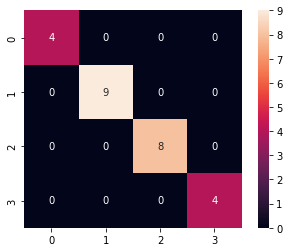

In [79]:
cm =confusion_matrix(y_test,y_pred_XGB)
sns.heatmap(cm, square=True , annot=True)

<div class="alert alert-block alert-info" dir="ltr" style="text-align: center;"><strong> <span style="font-family: courier new, courier; font-size: 18pt;"> Neural network  </span></strong>

In [80]:
from sklearn.neural_network import MLPClassifier

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.25, random_state = 4)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(75, 5)
(75,)
(25, 5)
(25,)


In [82]:
model = MLPClassifier(hidden_layer_sizes=(1) , max_iter=110 , alpha=1e-4, solver='sgd', random_state=1 
                     ,verbose=True , learning_rate_init=0.5 )

In [83]:
model.fit(X_train, y_train);

Iteration 1, loss = 1.57219181
Iteration 2, loss = 1.45174477
Iteration 3, loss = 1.35519020
Iteration 4, loss = 1.29931852
Iteration 5, loss = 1.27987557
Iteration 6, loss = 1.28525240
Iteration 7, loss = 1.30142518
Iteration 8, loss = 1.31620071
Iteration 9, loss = 1.32310133
Iteration 10, loss = 1.32157500
Iteration 11, loss = 1.31431388
Iteration 12, loss = 1.30454918
Iteration 13, loss = 1.29481457
Iteration 14, loss = 1.28682789
Iteration 15, loss = 1.28159271
Iteration 16, loss = 1.27933940
Iteration 17, loss = 1.27948586
Iteration 18, loss = 1.28087368
Iteration 19, loss = 1.28226648
Iteration 20, loss = 1.28284395
Iteration 21, loss = 1.28241894
Iteration 22, loss = 1.28131215
Iteration 23, loss = 1.28003721
Iteration 24, loss = 1.27901137
Iteration 25, loss = 1.27841852
Iteration 26, loss = 1.27822489
Iteration 27, loss = 1.27827590
Iteration 28, loss = 1.27839984
Iteration 29, loss = 1.27847556
Iteration 30, loss = 1.27845498
Iteration 31, loss = 1.27835098
Iteration 32, los

In [84]:
model.score(X_train, y_train)

0.41333333333333333